- gender 성별
- age 나이
- height 키
- weight 몸무게
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력

- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압
- fasting blood sugar 공복혈당
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- hemoglobin 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련

- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
df = pd.read_csv('C:/ds_work/ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [5]:
# 범주형 데이터 변환
df = df.replace({'N':0,'Y':1,'F':0,'M':1, })
gender = {'F': 0, 'M': 1}
oral = {'N': 0, 'T': 1}
tartar = {'N': 0, 'T': 1}
# df 전체 float형으로 바꾸기
df = df.astype(float)

In [6]:
#흡연과 간 건강에 대한 상관 관계
#2p -> 간접 독성 효과로 2차적인 적혈구증가증을 초래, 적혈구 생성과 파괴

#AST와 hemoglobin
df['AST'].corr(df['hemoglobin'],method = 'pearson')
#0.12057465854691066

#ALT와 hemoglobin
df['ALT'].corr(df['hemoglobin'],method = 'pearson')
#0.20202543629421119

#감마-GTP와 hemoglobin
df['Gtp'].corr(df['hemoglobin'],method = 'pearson')

#AST와 smoking
df['AST'].corr(df['smoking'],method = 'pearson')

#ALT와 smoking
df['ALT'].corr(df['smoking'],method = 'pearson')

df['Gtp'].corr(df['smoking'],method = 'pearson')

df['AST'].corr(df['systolic'],method = 'pearson')

0.12057465854691066

0.20202543629421119

0.22384448057497006

0.05925321019953094

0.09733797459025938

0.2366189192879358

0.08320382157223719

In [6]:
target = df.loc[:, 'smoking']
target

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
55687    0.0
55688    0.0
55689    0.0
55690    0.0
55691    1.0
Name: smoking, Length: 55692, dtype: float64

In [7]:
df_li = df.iloc[:, 10:18]
#df_li

df_bl = df.iloc[:, 20:23]
#df_bl

li_bl = pd.concat([df_li,df_bl],axis=1)
liver_blood = pd.concat([li_bl,target], axis=1)
liver_blood

,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,smoking
0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,18.0,19.0,27.0,0.0
1,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,22.0,19.0,18.0,0.0
2,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,21.0,16.0,22.0,1.0
3,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,19.0,26.0,18.0,0.0
4,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,16.0,14.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55687,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,14.0,7.0,10.0,0.0
55688,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,20.0,12.0,14.0,0.0
55689,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,17.0,11.0,12.0,0.0
55690,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,20.0,19.0,18.0,0.0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(liver_blood.iloc[:,:-1],liver_blood.iloc[:,-1], test_size=0.2, random_state=42)

### 스케일링(정규화 표준화)
- 스케일링 할 때에, sklearn 모듈을 사용하면 데이터프레임 전체를 한번에 변환가능하나, 특성에 따라 각기 다른 스케일링을 적용하는게 유리할 경우가 있습니다.
- 로지스틱 회귀나 트리 기반 모델인 의사결정나무, 랜덤 포레스트 , 그래디언트 부스팅은 변수의 크기에 민감하지 않으므로 표준화를 수행해줄 필요가 없다. 
- 4. 서포트벡터머신(SVM) 
    - 서포트벡터 머신은 서포트벡터와 분류기(hyperplane) 사이 거리인 마진(margin)을 최대로 만들어주는 분류기를 찾는 알고리즘이다. 따라서, 큰 값을 가지는 변수가 거리 계산을 할 때 영향력을 많이 미치게 된다. 

#### StandardScaler
- 모든 피처들을 평균이 0, 분산이 1인 정규분포를 갖도록 만들어줌(표준화)
- 이상치가 있는 경우 데이터 평균과 분산에 크게 영향을 주기 때문에 스케일링 방법으로 적절 X
- 회귀보다 분류에 유용

In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)

print("x_train_std mean : ",x_train_std.mean())
print("x_train_std std: ",x_train_std.std())

print("x_test_std mean: ",x_test_std.mean())
print("x_test_std std: ",x_test_std.std())

x_train_std mean :  9.879220869667633e-17
x_train_std std:  1.0
x_test_std mean:  0.0006574639658312238
x_test_std std:  0.9622086564307376


#### MinMaxScaler
- 모든 피처들이 0과 1사이의 데이터값을 갖도록 만들어줌(최솟값 0, 최댓값 1)
- 이상치가 존재할 땐 스케일링 방법으로 적합 X(이상치가 극값이 되기 때문)


In [9]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

x_train_t = mms.fit_transform(X_train)
x_test_t = mms.transform(X_test)

print("x_train_t max : ",x_train_t.max())
print("x_train_t min: ",x_train_t.min())

print("x_test_t max : ",x_test_t.max())
print("x_test_t min: ",x_test_t.min())


x_train_t max :  1.0000000000000002
x_train_t min:  0.0
x_test_t max :  1.2175066312997347
x_test_t min:  0.0


numpy.ndarray

#### Robust Scaler
- StandardScaler와 비슷
- 중간값과 사분위값 사용(이상치의 영향 최소화)
- 활용하면 데이터가 더 넓게 분포


In [15]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

x_train_r = rbs.fit_transform(X_train)
x_test_r = rbs.transform(X_test)

print("x_train_r mean : ",x_train_r.mean())
print("x_test_r mean : ",x_test_r.mean())

x_train_r mean :  0.1742637262222954
x_test_r mean :  0.17066809358091725


#### log Scaler

### 3. 훈련01 : 전체 모델 구현으로 정확도 확인

#### DecisionTreeClassifier

DecisionTreeClassifier()

0.7628153335128827

confusion_matrix : 
 [[5690 1337]
 [1305 2807]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

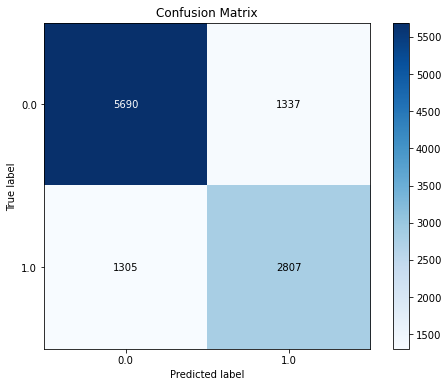

리포트:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      7027
         1.0       0.68      0.68      0.68      4112

    accuracy                           0.76     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.76      0.76      0.76     11139



In [12]:
#스케일링 안했을 때

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

DecisionTreeClassifier()

0.7653290241493851

confusion_matrix : 
 [[5682 1345]
 [1269 2843]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

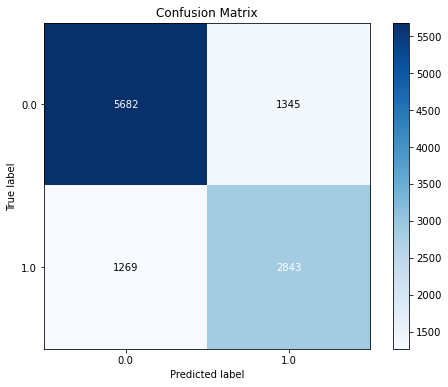

리포트:
               precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      7027
         1.0       0.68      0.69      0.69      4112

    accuracy                           0.77     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.77      0.77      0.77     11139



In [9]:
#StandardScaler : 정확도 가장 높음

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(x_train_std,y_train)

pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_std)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

DecisionTreeClassifier()

0.7629948828440614

confusion_matrix : 
 [[5681 1346]
 [1294 2818]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

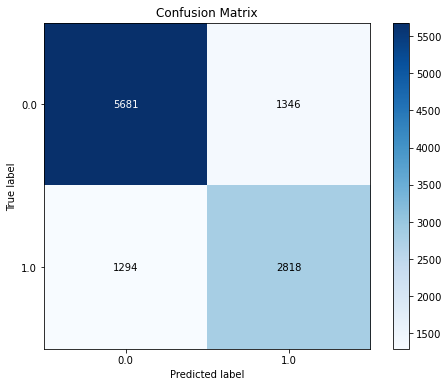

리포트:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      7027
         1.0       0.68      0.69      0.68      4112

    accuracy                           0.76     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.76      0.76      0.76     11139



In [11]:
#MinMaxScaler(큰 차이 없음)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(x_train_t,y_train)

pred = model.predict(x_test_t)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_t)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

DecisionTreeClassifier()

0.7624562348505252

confusion_matrix : 
 [[5674 1353]
 [1293 2819]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

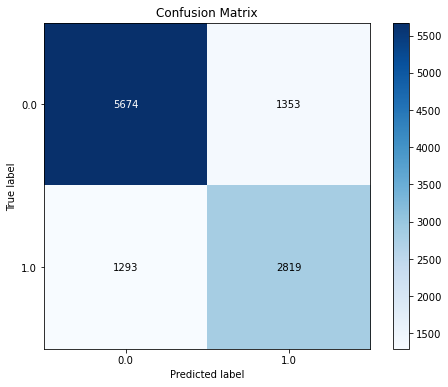

리포트:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      7027
         1.0       0.68      0.69      0.68      4112

    accuracy                           0.76     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.76      0.76      0.76     11139



In [16]:
#Robust Scaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(x_train_r,y_train)

pred = model.predict(x_test_r)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_r)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

#### RandomForestClassifier

RandomForestClassifier()

0.8023161863722058

confusion_matrix : 
 [[6045  982]
 [1220 2892]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

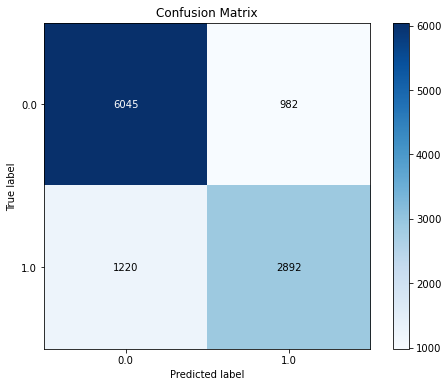

리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      7027
         1.0       0.75      0.70      0.72      4112

    accuracy                           0.80     11139
   macro avg       0.79      0.78      0.79     11139
weighted avg       0.80      0.80      0.80     11139



In [21]:
# 스케일링 안했을 때

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

RandomForestClassifier()

0.8043810036807613

confusion_matrix : 
 [[6046  981]
 [1198 2914]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

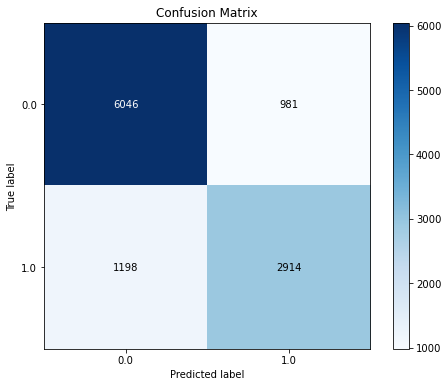

리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      7027
         1.0       0.75      0.71      0.73      4112

    accuracy                           0.80     11139
   macro avg       0.79      0.78      0.79     11139
weighted avg       0.80      0.80      0.80     11139



In [17]:
# StandardScaler 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(x_train_std,y_train)

pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_std)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

RandomForestClassifier()

0.8045605530119401

confusion_matrix : 
 [[6062  965]
 [1212 2900]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

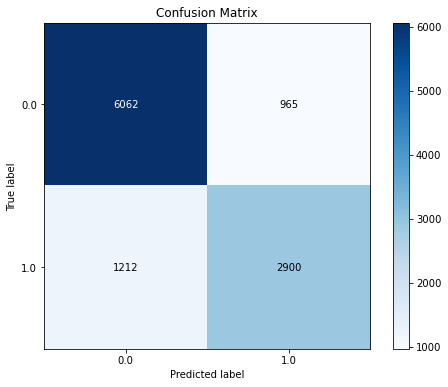

리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      7027
         1.0       0.75      0.71      0.73      4112

    accuracy                           0.80     11139
   macro avg       0.79      0.78      0.79     11139
weighted avg       0.80      0.80      0.80     11139



In [18]:
# MinMaxScaler 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(x_train_t,y_train)

pred = model.predict(x_test_t)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_t)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

RandomForestClassifier()

0.8071640183140317

confusion_matrix : 
 [[6084  943]
 [1205 2907]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

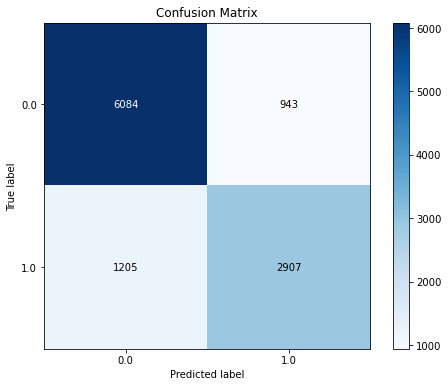

리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      7027
         1.0       0.76      0.71      0.73      4112

    accuracy                           0.81     11139
   macro avg       0.79      0.79      0.79     11139
weighted avg       0.81      0.81      0.81     11139



In [19]:
#Robust Scaler : 정확도 가장 높음

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(x_train_r,y_train)

pred = model.predict(x_test_r)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_r)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### XGBoost

[0]	validation_0-logloss:0.62106
[1]	validation_0-logloss:0.58149
[2]	validation_0-logloss:0.55816
[3]	validation_0-logloss:0.54366
[4]	validation_0-logloss:0.53467
[5]	validation_0-logloss:0.52842
[6]	validation_0-logloss:0.52410
[7]	validation_0-logloss:0.52137
[8]	validation_0-logloss:0.51928
[9]	validation_0-logloss:0.51768
[10]	validation_0-logloss:0.51671
[11]	validation_0-logloss:0.51613
[12]	validation_0-logloss:0.51547
[13]	validation_0-logloss:0.51476
[14]	validation_0-logloss:0.51476
[15]	validation_0-logloss:0.51457
[16]	validation_0-logloss:0.51379
[17]	validation_0-logloss:0.51322
[18]	validation_0-logloss:0.51321
[19]	validation_0-logloss:0.51305
[20]	validation_0-logloss:0.51332
[21]	validation_0-logloss:0.51326
[22]	validation_0-logloss:0.51348
[23]	validation_0-logloss:0.51339
[24]	validation_0-logloss:0.51333
[25]	validation_0-logloss:0.51313
[26]	validation_0-logloss:0.51318
[27]	validation_0-logloss:0.51328
[28]	validation_0-logloss:0.51304
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.73893527246611

confusion_matrix : 
 [[5690 1337]
 [1571 2541]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

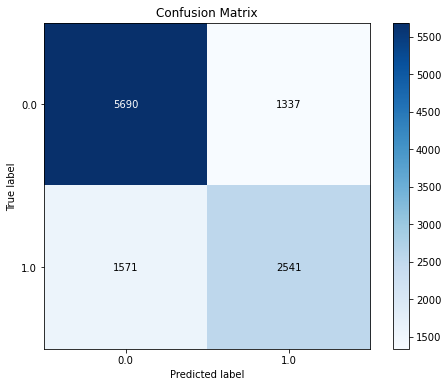

리포트:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      7027
         1.0       0.66      0.62      0.64      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.71      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [22]:
# 스케일링 안했을 때

import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

[0]	validation_0-logloss:0.62106
[1]	validation_0-logloss:0.58147
[2]	validation_0-logloss:0.55814
[3]	validation_0-logloss:0.54364
[4]	validation_0-logloss:0.53465
[5]	validation_0-logloss:0.52841
[6]	validation_0-logloss:0.52408
[7]	validation_0-logloss:0.52136
[8]	validation_0-logloss:0.51926
[9]	validation_0-logloss:0.51765
[10]	validation_0-logloss:0.51669
[11]	validation_0-logloss:0.51611
[12]	validation_0-logloss:0.51545
[13]	validation_0-logloss:0.51474
[14]	validation_0-logloss:0.51474
[15]	validation_0-logloss:0.51455
[16]	validation_0-logloss:0.51377
[17]	validation_0-logloss:0.51320
[18]	validation_0-logloss:0.51319
[19]	validation_0-logloss:0.51303
[20]	validation_0-logloss:0.51330
[21]	validation_0-logloss:0.51324
[22]	validation_0-logloss:0.51346
[23]	validation_0-logloss:0.51337
[24]	validation_0-logloss:0.51331
[25]	validation_0-logloss:0.51311
[26]	validation_0-logloss:0.51316
[27]	validation_0-logloss:0.51325
[28]	validation_0-logloss:0.51302
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.73893527246611

confusion_matrix : 
 [[5690 1337]
 [1571 2541]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

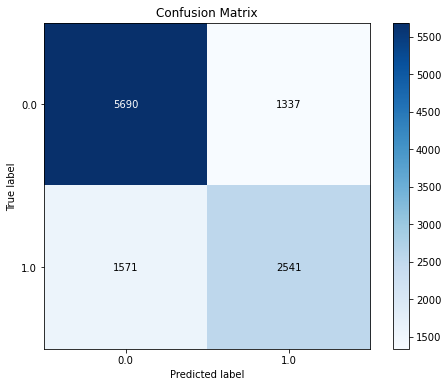

리포트:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      7027
         1.0       0.66      0.62      0.64      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.71      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [24]:
# StandardScaler : 차이 없음

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(x_test_std, y_test)]
model.fit(x_train_std, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_std)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

[0]	validation_0-logloss:0.62106
[1]	validation_0-logloss:0.58149
[2]	validation_0-logloss:0.55816
[3]	validation_0-logloss:0.54366
[4]	validation_0-logloss:0.53467
[5]	validation_0-logloss:0.52842
[6]	validation_0-logloss:0.52410
[7]	validation_0-logloss:0.52137
[8]	validation_0-logloss:0.51928
[9]	validation_0-logloss:0.51768
[10]	validation_0-logloss:0.51671
[11]	validation_0-logloss:0.51613
[12]	validation_0-logloss:0.51547
[13]	validation_0-logloss:0.51476
[14]	validation_0-logloss:0.51476
[15]	validation_0-logloss:0.51457
[16]	validation_0-logloss:0.51379
[17]	validation_0-logloss:0.51322
[18]	validation_0-logloss:0.51321
[19]	validation_0-logloss:0.51305
[20]	validation_0-logloss:0.51332
[21]	validation_0-logloss:0.51326
[22]	validation_0-logloss:0.51348
[23]	validation_0-logloss:0.51339
[24]	validation_0-logloss:0.51333
[25]	validation_0-logloss:0.51313
[26]	validation_0-logloss:0.51318
[27]	validation_0-logloss:0.51328
[28]	validation_0-logloss:0.51304
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7388454978005207

confusion_matrix : 
 [[5689 1338]
 [1571 2541]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

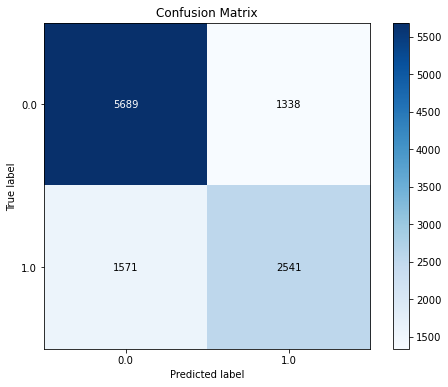

리포트:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      7027
         1.0       0.66      0.62      0.64      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.71      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [27]:
# MinMaxScaler : 오히려 떨어짐

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(x_test_t, y_test)]
model.fit(x_train_t, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(x_test_t)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_t)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

[0]	validation_0-logloss:0.62106
[1]	validation_0-logloss:0.58147
[2]	validation_0-logloss:0.55814
[3]	validation_0-logloss:0.54364
[4]	validation_0-logloss:0.53465
[5]	validation_0-logloss:0.52838
[6]	validation_0-logloss:0.52405
[7]	validation_0-logloss:0.52133
[8]	validation_0-logloss:0.51923
[9]	validation_0-logloss:0.51763
[10]	validation_0-logloss:0.51667
[11]	validation_0-logloss:0.51608
[12]	validation_0-logloss:0.51543
[13]	validation_0-logloss:0.51471
[14]	validation_0-logloss:0.51471
[15]	validation_0-logloss:0.51452
[16]	validation_0-logloss:0.51374
[17]	validation_0-logloss:0.51317
[18]	validation_0-logloss:0.51316
[19]	validation_0-logloss:0.51300
[20]	validation_0-logloss:0.51327
[21]	validation_0-logloss:0.51321
[22]	validation_0-logloss:0.51343
[23]	validation_0-logloss:0.51334
[24]	validation_0-logloss:0.51328
[25]	validation_0-logloss:0.51309
[26]	validation_0-logloss:0.51314
[27]	validation_0-logloss:0.51323
[28]	validation_0-logloss:0.51299
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7388454978005207

confusion_matrix : 
 [[5689 1338]
 [1571 2541]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

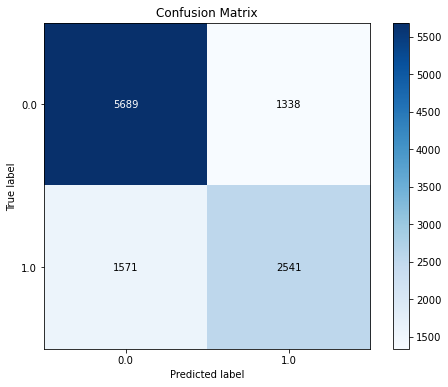

리포트:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      7027
         1.0       0.66      0.62      0.64      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.71      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [26]:
# RobustScaler : minmax와 동일

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(x_test_r, y_test)]
model.fit(x_train_r, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(x_test_r)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(x_test_r)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

96
0.5027907353989626


0.7391003636402997

array([0.04835065, 0.04338222, 0.03857255, 0.05113811, 0.05825044,
       0.04877001, 0.04987183, 0.40950012, 0.05510067, 0.04940157,
       0.1476618 ], dtype=float32)

<BarContainer object of 11 artists>

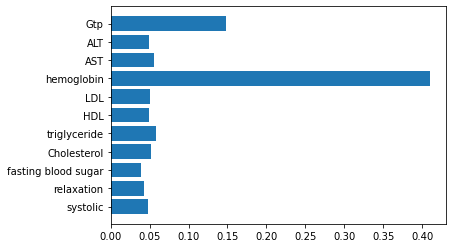

In [31]:
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(liver_blood.iloc[:,:-1].columns, model.feature_importances_)

96
0.5027907353989626


0.8044771135035459

array([0.04835065, 0.04338222, 0.03857255, 0.05113811, 0.05825044,
       0.04877001, 0.04987183, 0.40950012, 0.05510067, 0.04940157,
       0.1476618 ], dtype=float32)

<BarContainer object of 11 artists>

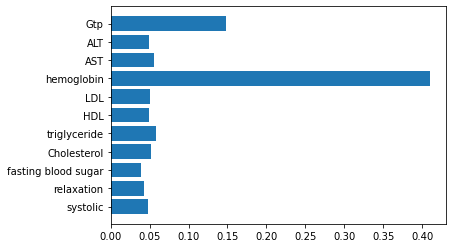

In [32]:
#StandardScaler()
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(x_test_std)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(liver_blood.iloc[:,:-1].columns, model.feature_importances_)

96
0.5027907353989626


0.5027907371259884

array([0.04835065, 0.04338222, 0.03857255, 0.05113811, 0.05825044,
       0.04877001, 0.04987183, 0.40950012, 0.05510067, 0.04940157,
       0.1476618 ], dtype=float32)

<BarContainer object of 11 artists>

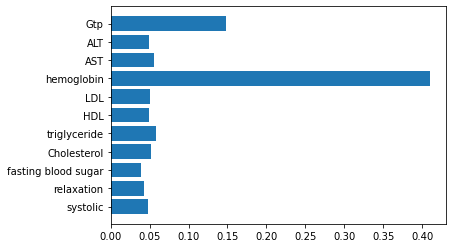

In [33]:
#MinMaxScaler()
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(x_test_t)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(liver_blood.iloc[:,:-1].columns, model.feature_importances_)

96
0.5027907353989626


0.8354167763414231

array([0.04835065, 0.04338222, 0.03857255, 0.05113811, 0.05825044,
       0.04877001, 0.04987183, 0.40950012, 0.05510067, 0.04940157,
       0.1476618 ], dtype=float32)

<BarContainer object of 11 artists>

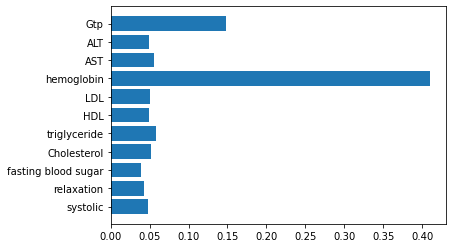

In [34]:
#RobustScaler()
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(x_test_r)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(liver_blood.iloc[:,:-1].columns, model.feature_importances_)

### LGBMClassifier

[1]	valid_0's binary_logloss: 0.637095
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.619578
[3]	valid_0's binary_logloss: 0.60506
[4]	valid_0's binary_logloss: 0.592741
[5]	valid_0's binary_logloss: 0.582408
[6]	valid_0's binary_logloss: 0.573445
[7]	valid_0's binary_logloss: 0.566007
[8]	valid_0's binary_logloss: 0.559685
[9]	valid_0's binary_logloss: 0.55412
[10]	valid_0's binary_logloss: 0.549349
[11]	valid_0's binary_logloss: 0.545372
[12]	valid_0's binary_logloss: 0.541445
[13]	valid_0's binary_logloss: 0.538351
[14]	valid_0's binary_logloss: 0.535543
[15]	valid_0's binary_logloss: 0.533266
[16]	valid_0's binary_logloss: 0.530972
[17]	valid_0's binary_logloss: 0.529179
[18]	valid_0's binary_logloss: 0.527432
[19]	valid_0's binary_logloss: 0.526081
[20]	valid_0's binary_logloss: 0.524685
[21]	valid_0's binary_logloss: 0.523541
[22]	valid_0's binary_logloss: 0.522486
[23]	valid_0's binary_logloss: 0.521609
[24]	valid_0's binary_logloss:

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.7263668192835981

confusion_matrix : 
 [[5615 1412]
 [1636 2476]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

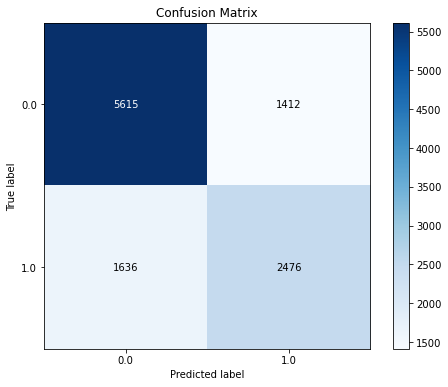

In [37]:
#스케일링 안했을 때

import lightgbm as lgb # 분류 회귀 다 됨
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

[1]	valid_0's binary_logloss: 0.637095
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.619578
[3]	valid_0's binary_logloss: 0.60506
[4]	valid_0's binary_logloss: 0.592741
[5]	valid_0's binary_logloss: 0.582408
[6]	valid_0's binary_logloss: 0.573445
[7]	valid_0's binary_logloss: 0.566007
[8]	valid_0's binary_logloss: 0.559685
[9]	valid_0's binary_logloss: 0.55412
[10]	valid_0's binary_logloss: 0.549359
[11]	valid_0's binary_logloss: 0.545162
[12]	valid_0's binary_logloss: 0.541631
[13]	valid_0's binary_logloss: 0.538549
[14]	valid_0's binary_logloss: 0.53596
[15]	valid_0's binary_logloss: 0.533843
[16]	valid_0's binary_logloss: 0.53172
[17]	valid_0's binary_logloss: 0.529999
[18]	valid_0's binary_logloss: 0.528452
[19]	valid_0's binary_logloss: 0.52698
[20]	valid_0's binary_logloss: 0.525733
[21]	valid_0's binary_logloss: 0.524642
[22]	valid_0's binary_logloss: 0.523893
[23]	valid_0's binary_logloss: 0.522702
[24]	valid_0's binary_logloss: 0.

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.7237633539815064

confusion_matrix : 
 [[5610 1417]
 [1660 2452]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

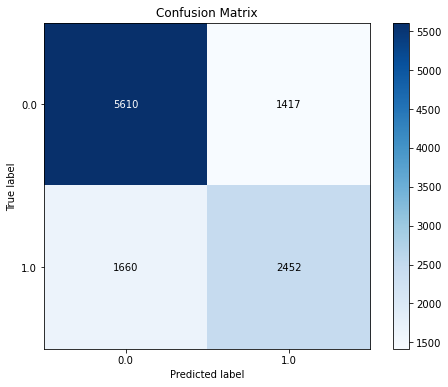

리포트:
               precision    recall  f1-score   support

         0.0       0.77      0.80      0.78      7027
         1.0       0.63      0.60      0.61      4112

    accuracy                           0.72     11139
   macro avg       0.70      0.70      0.70     11139
weighted avg       0.72      0.72      0.72     11139



In [36]:
#StandardScaler() : 오히려 낮음
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(x_test_std, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(x_train_std, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

pred = model.predict(x_test_std)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

[1]	valid_0's binary_logloss: 0.637095
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.619578
[3]	valid_0's binary_logloss: 0.60506
[4]	valid_0's binary_logloss: 0.592741
[5]	valid_0's binary_logloss: 0.582408
[6]	valid_0's binary_logloss: 0.573445
[7]	valid_0's binary_logloss: 0.566007
[8]	valid_0's binary_logloss: 0.559685
[9]	valid_0's binary_logloss: 0.55412
[10]	valid_0's binary_logloss: 0.549349
[11]	valid_0's binary_logloss: 0.545372
[12]	valid_0's binary_logloss: 0.541445
[13]	valid_0's binary_logloss: 0.538351
[14]	valid_0's binary_logloss: 0.535543
[15]	valid_0's binary_logloss: 0.533266
[16]	valid_0's binary_logloss: 0.530972
[17]	valid_0's binary_logloss: 0.529179
[18]	valid_0's binary_logloss: 0.527432
[19]	valid_0's binary_logloss: 0.526081
[20]	valid_0's binary_logloss: 0.524685
[21]	valid_0's binary_logloss: 0.523541
[22]	valid_0's binary_logloss: 0.522486
[23]	valid_0's binary_logloss: 0.521609
[24]	valid_0's binary_logloss:

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.7263668192835981

confusion_matrix : 
 [[5615 1412]
 [1636 2476]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

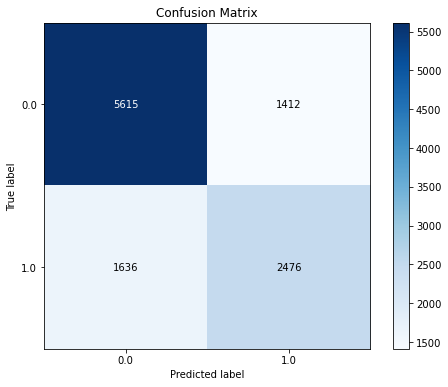

리포트:
               precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      7027
         1.0       0.64      0.60      0.62      4112

    accuracy                           0.73     11139
   macro avg       0.71      0.70      0.70     11139
weighted avg       0.72      0.73      0.72     11139



In [37]:
# MinMaxScaler() : 큰 차이 없음
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(x_test_t, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(x_train_t, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(x_test_t)
acc = accuracy_score(y_test,pred)
acc

pred = model.predict(x_test_t)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

[1]	valid_0's binary_logloss: 0.637095
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.619578
[3]	valid_0's binary_logloss: 0.60506
[4]	valid_0's binary_logloss: 0.592741
[5]	valid_0's binary_logloss: 0.582408
[6]	valid_0's binary_logloss: 0.573445
[7]	valid_0's binary_logloss: 0.566007
[8]	valid_0's binary_logloss: 0.559685
[9]	valid_0's binary_logloss: 0.55412
[10]	valid_0's binary_logloss: 0.549359
[11]	valid_0's binary_logloss: 0.545162
[12]	valid_0's binary_logloss: 0.541631
[13]	valid_0's binary_logloss: 0.538549
[14]	valid_0's binary_logloss: 0.53596
[15]	valid_0's binary_logloss: 0.533843
[16]	valid_0's binary_logloss: 0.53172
[17]	valid_0's binary_logloss: 0.529999
[18]	valid_0's binary_logloss: 0.528452
[19]	valid_0's binary_logloss: 0.52698
[20]	valid_0's binary_logloss: 0.525733
[21]	valid_0's binary_logloss: 0.524642
[22]	valid_0's binary_logloss: 0.523893
[23]	valid_0's binary_logloss: 0.522702
[24]	valid_0's binary_logloss: 0.

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.7291498339168686

confusion_matrix : 
 [[5645 1382]
 [1635 2477]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

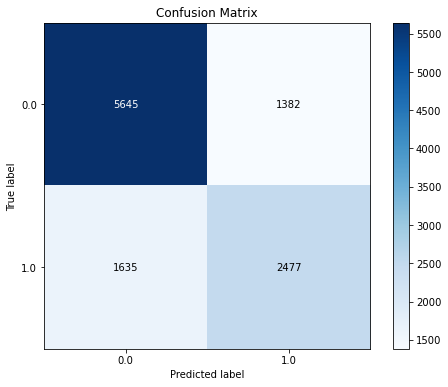

리포트:
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      7027
         1.0       0.64      0.60      0.62      4112

    accuracy                           0.73     11139
   macro avg       0.71      0.70      0.71     11139
weighted avg       0.73      0.73      0.73     11139



In [38]:
#RobustScaler()
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(x_test_r, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(x_train_r, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(x_test_r)
acc = accuracy_score(y_test,pred)
acc

pred = model.predict(x_test_r)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [38]:
print(model.best_iteration_)
print(model.best_score_)

66
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.5137911514141607)])})


In [39]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.5137911514141609

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

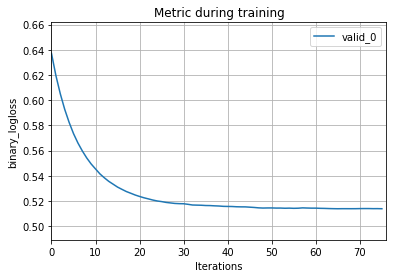

In [40]:
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

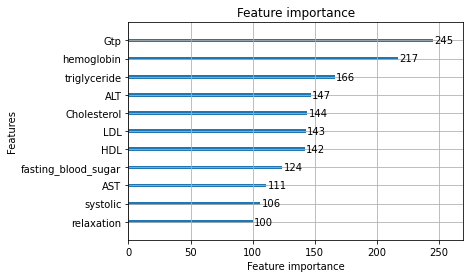

In [41]:
lgb.plot_importance(model)

### Logistic Regression

LogisticRegression(max_iter=10000)

['MINIproject']

0.7052697728700961

0.7052697728700961

confusion_matrix : 
 [[5615 1412]
 [1636 2476]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

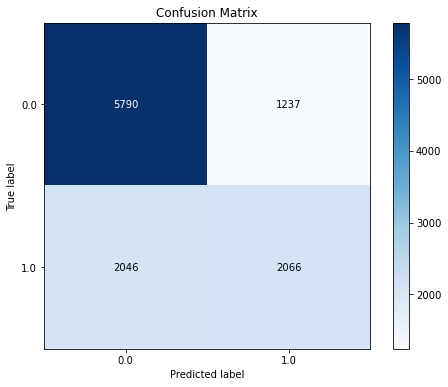

In [42]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 10000)

model2.fit(X_train,y_train)

import joblib
joblib.dump(model2, 'MINIproject')

model2.score(X_test,y_test)
pred_2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,pred_2)
acc2

# 실제 , 예측
cm_2 = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm_2)

skplt.metrics.plot_confusion_matrix(y_test,pred_2,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

LogisticRegression(max_iter=10000)

0.7056288715324536

0.7056288715324536

confusion_matrix : 
 [[5794 1233]
 [2046 2066]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

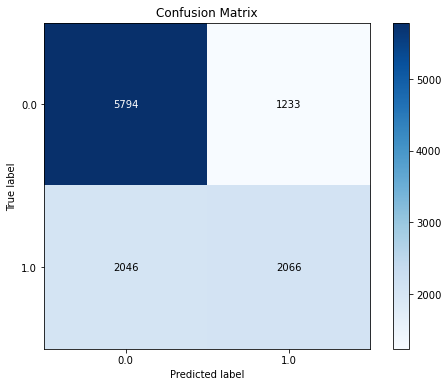

리포트:
               precision    recall  f1-score   support

         0.0       0.74      0.82      0.78      7027
         1.0       0.63      0.50      0.56      4112

    accuracy                           0.71     11139
   macro avg       0.68      0.66      0.67     11139
weighted avg       0.70      0.71      0.70     11139



In [40]:
#StandardScaler
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000)

model.fit(x_train_std,y_train)

model.score(x_test_std,y_test)
pred = model.predict(x_test_std)
acc = accuracy_score(y_test,pred)
acc

# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

LogisticRegression(max_iter=10000)

0.7031151808959512

0.7031151808959512

confusion_matrix : 
 [[5785 1242]
 [2065 2047]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

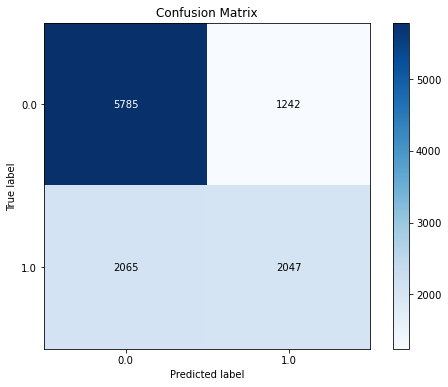

리포트:
               precision    recall  f1-score   support

         0.0       0.74      0.82      0.78      7027
         1.0       0.62      0.50      0.55      4112

    accuracy                           0.70     11139
   macro avg       0.68      0.66      0.67     11139
weighted avg       0.69      0.70      0.69     11139



In [41]:
#MinMaxScaler
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000)

model.fit(x_train_t,y_train)

model.score(x_test_t,y_test)
pred = model.predict(x_test_t)
acc = accuracy_score(y_test,pred)
acc

# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

LogisticRegression(max_iter=10000)

0.7056288715324536

0.7056288715324536

confusion_matrix : 
 [[5794 1233]
 [2046 2066]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

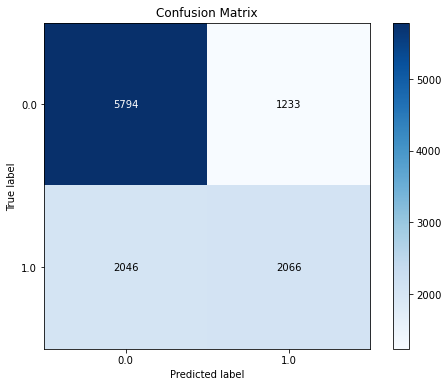

리포트:
               precision    recall  f1-score   support

         0.0       0.74      0.82      0.78      7027
         1.0       0.63      0.50      0.56      4112

    accuracy                           0.71     11139
   macro avg       0.68      0.66      0.67     11139
weighted avg       0.70      0.71      0.70     11139



In [42]:
#Robust Scaler
model = LogisticRegression(max_iter = 10000)

model.fit(x_train_r,y_train)

model.score(x_test_r,y_test)
pred = model.predict(x_test_r)
acc = accuracy_score(y_test,pred)
acc

# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### Support Vector Machine

SVC()

0.7014992369153424

confusion_matrix : 
 [[6105  922]
 [2403 1709]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

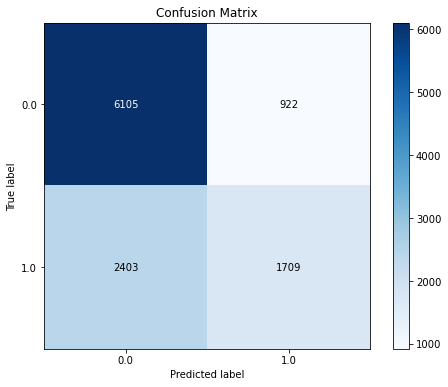

In [43]:
### 모델 - svm ###

from sklearn import svm
from sklearn.metrics import accuracy_score


model = svm.SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

SVC()

0.7197234940299847

confusion_matrix : 
 [[5831 1196]
 [1926 2186]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

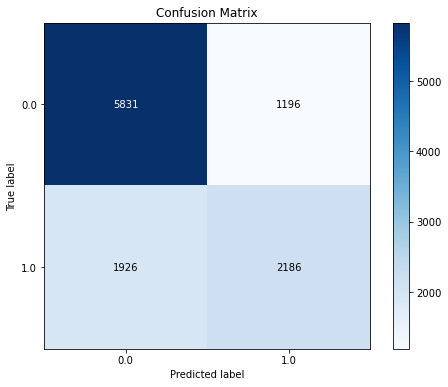

리포트:
               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79      7027
         1.0       0.65      0.53      0.58      4112

    accuracy                           0.72     11139
   macro avg       0.70      0.68      0.69     11139
weighted avg       0.71      0.72      0.71     11139



In [44]:
#StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score


model = svm.SVC()
model.fit(x_train_std, y_train)
pred = model.predict(x_test_std)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(x_test_std) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

SVC()

0.7087709848280815

confusion_matrix : 
 [[5960 1067]
 [2177 1935]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

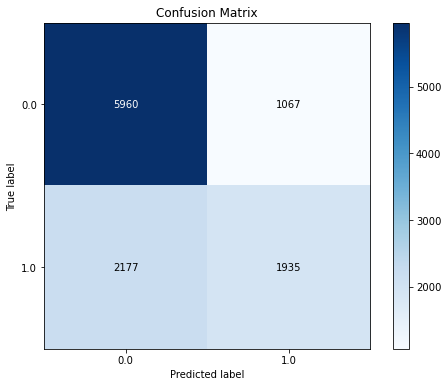

리포트:
               precision    recall  f1-score   support

         0.0       0.73      0.85      0.79      7027
         1.0       0.64      0.47      0.54      4112

    accuracy                           0.71     11139
   macro avg       0.69      0.66      0.67     11139
weighted avg       0.70      0.71      0.70     11139



In [45]:
#MinMaxScaler
model = svm.SVC()
model.fit(x_train_t, y_train)
pred = model.predict(x_test_t)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(x_test_t) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

SVC()

0.7189155220396805

confusion_matrix : 
 [[5885 1142]
 [1989 2123]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

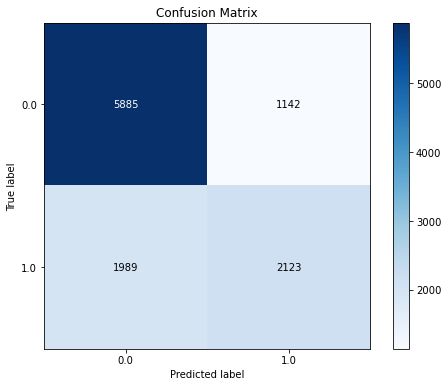

리포트:
               precision    recall  f1-score   support

         0.0       0.75      0.84      0.79      7027
         1.0       0.65      0.52      0.58      4112

    accuracy                           0.72     11139
   macro avg       0.70      0.68      0.68     11139
weighted avg       0.71      0.72      0.71     11139



In [46]:
#Robust Scaler
model = svm.SVC()
model.fit(x_train_r, y_train)
pred = model.predict(x_test_r)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(x_test_r) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)